In [1]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Attempting to read the CSV file using the default UTF-8 encoding caused a UnicodeDecodeError.
# To resolve this, we can specify a different encoding such as 'latin1', 'iso-8859-1', or 'cp1252'.
df=pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1') 

### Data Cleaning

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
df['Month']=df['released_month'].apply(lambda x: calendar.month_abbr[x])

In [7]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Jul
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,Mar
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,Jun
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,Aug
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,May


In [8]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
Month                   object
dtype: object

In [9]:
df['key'].fillna('Undefined', inplace=True)
df['in_shazam_charts'].fillna(0,inplace=True)

In [10]:
non_numeric_indices = df[~df['streams'].str.isnumeric()].index
print("Indices of non-numeric rows:")
print(non_numeric_indices)

Indices of non-numeric rows:
Index([574], dtype='int64')


In [11]:
for idx in non_numeric_indices:
    df.loc[idx, 'streams'] = '0' 

In [12]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [13]:
streams_mean=np.round(df['streams'].mean())

In [14]:
df['streams'][574]=streams_mean

C:\Users\chinm\AppData\Local\Temp\ipykernel_33012\1605224911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streams'][574]=streams_mean


In [15]:
df['streams'][574]

513597931

In [16]:
df['streams_scaled'] = df['streams'] / 10000000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   9

In [18]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
Month                   0
streams_scaled          0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.sample(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Month,streams_scaled
182,Creep,Radiohead,1,1992,9,21,36724,7,1271293243,146,...,Major,53,12,34,1,0,12,4,Sep,127.129324
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,Minor,48,44,42,12,2,11,3,Jan,129.702623
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,Major,80,82,80,43,0,14,4,Mar,89.918338
697,Something In The Way - Remastered 2021,Nirvana,1,1991,9,24,9514,0,368646862,45,...,Major,44,8,20,74,42,11,3,Sep,36.864686
279,Made You Look,Meghan Trainor,1,2022,10,21,3956,6,502574952,142,...,Major,84,88,53,35,0,8,7,Oct,50.257495
224,Players,Coi Leray,1,2022,11,30,4096,6,335074782,118,...,Major,95,62,52,3,0,5,16,Nov,33.507478
228,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin",2,2023,6,2,277,1,39666245,1,...,Major,59,26,60,46,1,25,13,Jun,3.966624
826,Yet To Come,BTS,1,2022,6,10,829,0,302006641,32,...,Major,56,68,89,4,0,33,19,Jun,30.200664
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,...,Major,56,48,73,0,0,35,4,Jul,1.478042
57,La Bachata,Manuel Turizo,1,2022,5,26,6804,45,1214083358,139,...,Minor,84,85,68,58,0,22,4,May,121.408336


### Data Visualization

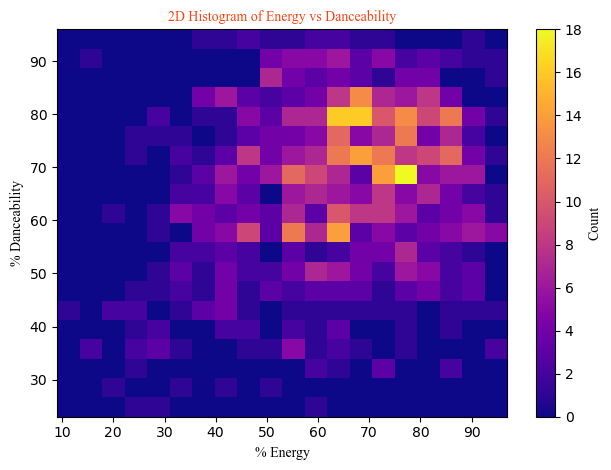

In [21]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(df['energy_%'],df['danceability_%'], bins=20, cmap='plasma')
cbar=plt.colorbar(hist[3],ax=ax)
cbar.set_label('Count', font='Times New Roman')
ax.set_xlabel('% Energy', font='Times New Roman')
ax.set_ylabel('% Danceability', font='Times New Roman')
ax.set_title('2D Histogram of Energy vs Danceability', color='#FE420F', font='Times New Roman')
plt.show()

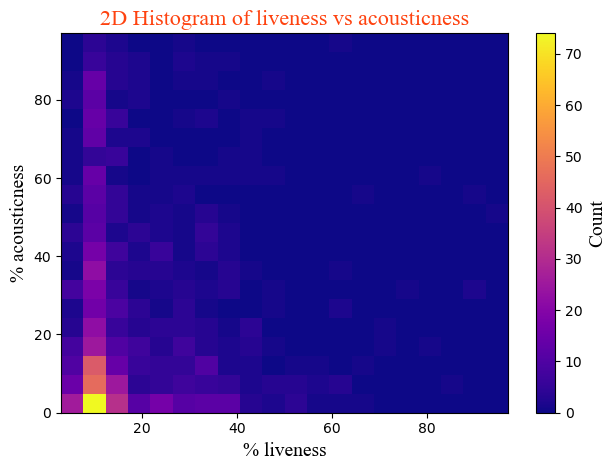

In [22]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(df['liveness_%'],df['acousticness_%'], bins=20, cmap='plasma')
cbar=plt.colorbar(hist[3],ax=ax)
cbar.set_label('Count', font='Times New Roman', fontsize='14')
ax.set_xlabel('% liveness', font='Times New Roman', fontsize='14')
ax.set_ylabel('% acousticness', font='Times New Roman', fontsize='14')
ax.set_title('2D Histogram of liveness vs acousticness', color='#FE420F', font='Times New Roman', fontsize='16')
plt.show()

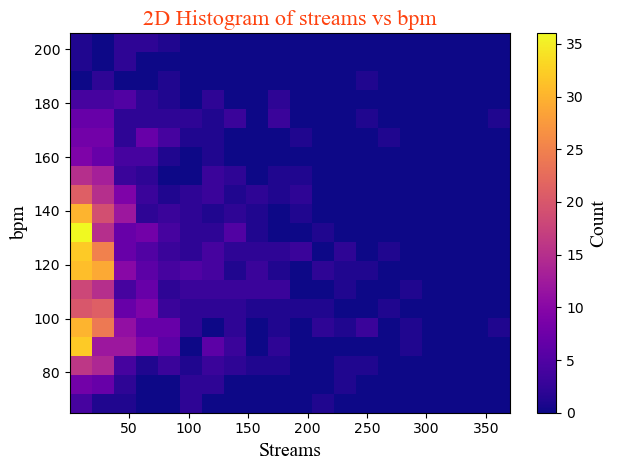

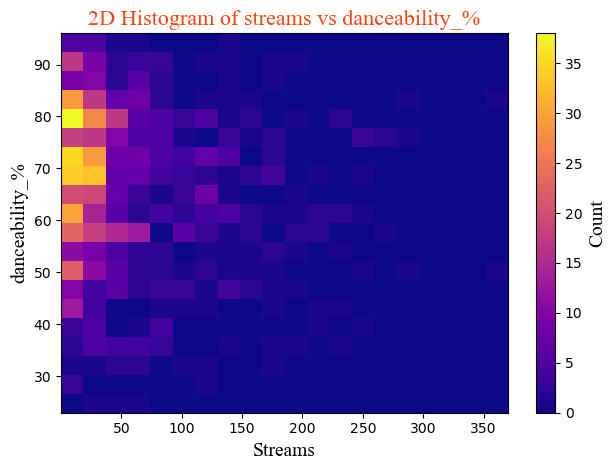

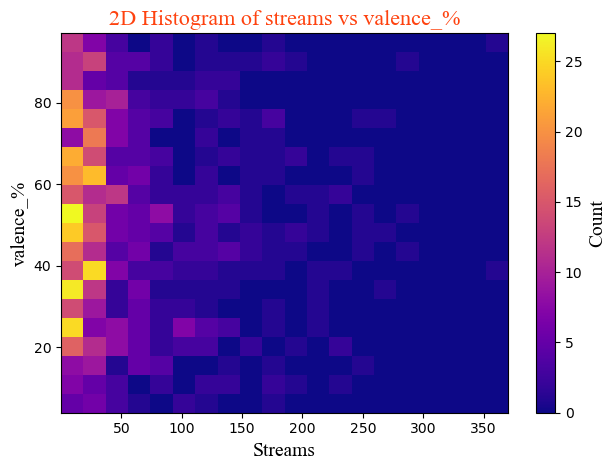

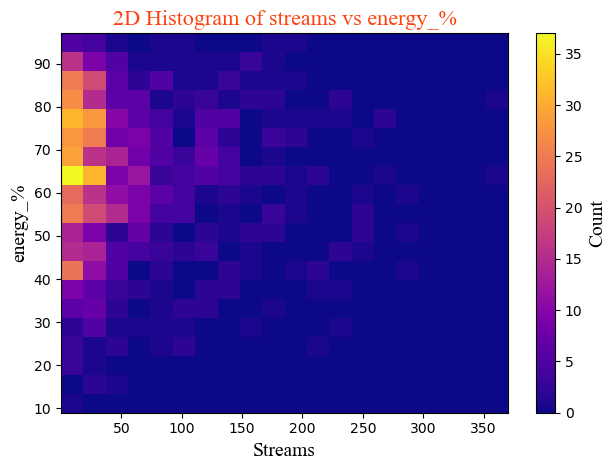

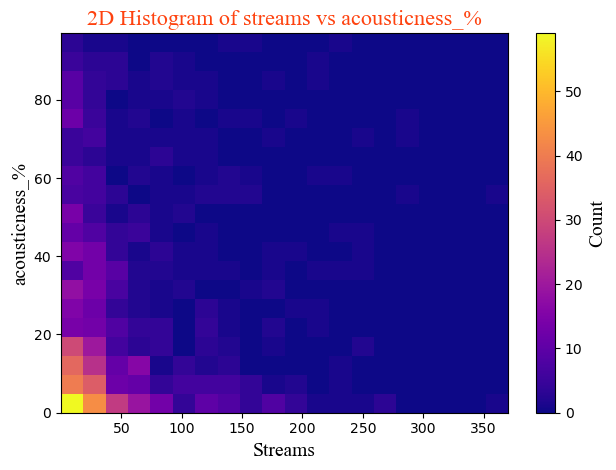

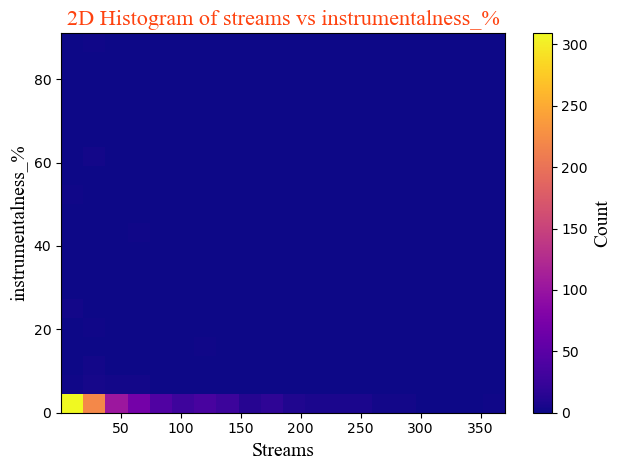

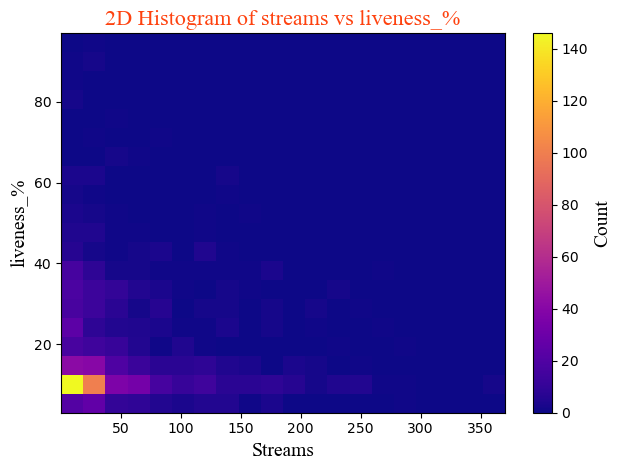

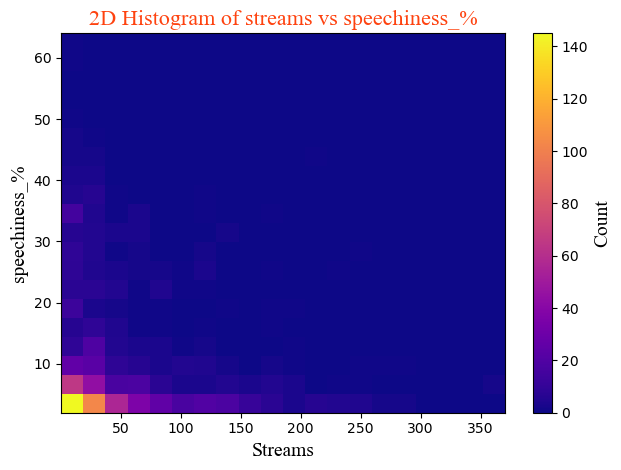

In [23]:
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for i in features:
    fig, ax = plt.subplots(tight_layout=True)
    hist = ax.hist2d(df['streams_scaled'], df[i], bins=20, cmap='plasma')
    cbar=plt.colorbar(hist[3],ax=ax)
    cbar.set_label('Count', font='Times New Roman', fontsize='14')
    ax.set_xlabel('Streams', font='Times New Roman', fontsize='14')
    ax.set_ylabel(i, font='Times New Roman', fontsize='14')
    ax.set_title(f'2D Histogram of streams vs {i}', color='#FE420F', font='Times New Roman', fontsize='16')
    plt.show()

In [24]:
def colors_from_values(values, palette_name):
    normed = (values - values.min()) / (values.max() - values.min())
    cmap = sns.color_palette(palette_name, as_cmap=True)
    return [cmap(x) for x in normed]

# Convert to list and make sure number of colors matches the number of unique years
unique_years = df['released_year'].unique()


C:\Users\chinm\AppData\Local\Temp\ipykernel_33012\3818778628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='released_year', y='in_spotify_charts', palette=colors)


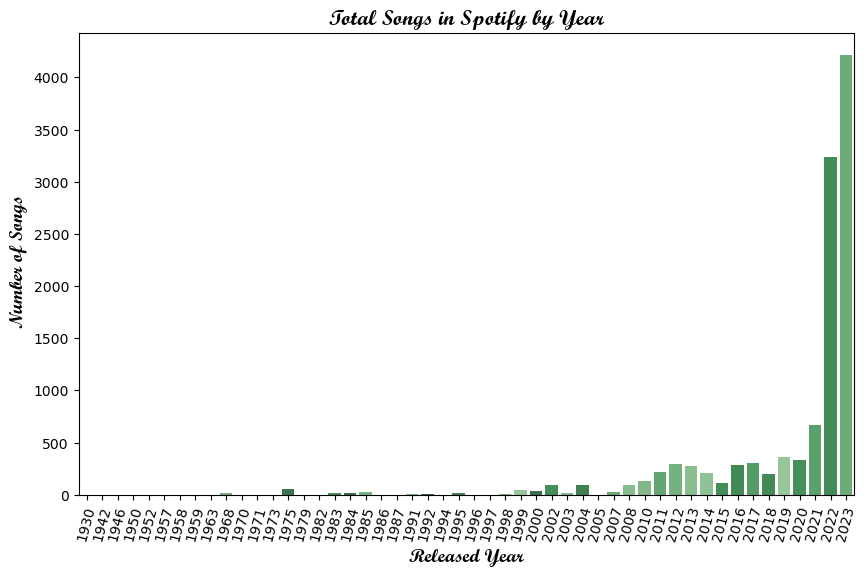

In [25]:
colors = colors_from_values(df['in_spotify_charts'], "Greens_d")[:len(unique_years)]
df_year = df.groupby('released_year')['in_spotify_charts'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='released_year', y='in_spotify_charts', palette=colors)
plt.xlabel('Released Year', font = 'Script MT Bold', fontsize='14')
plt.ylabel(' Number of Songs', font = 'Script MT Bold', fontsize='14')
plt.title('Total Songs in Spotify by Year',font = 'Script MT Bold',  fontsize='16')
plt.xticks(rotation=75)
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_33012\2533879604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_year, x='released_year', y='in_apple_charts', palette=colors)


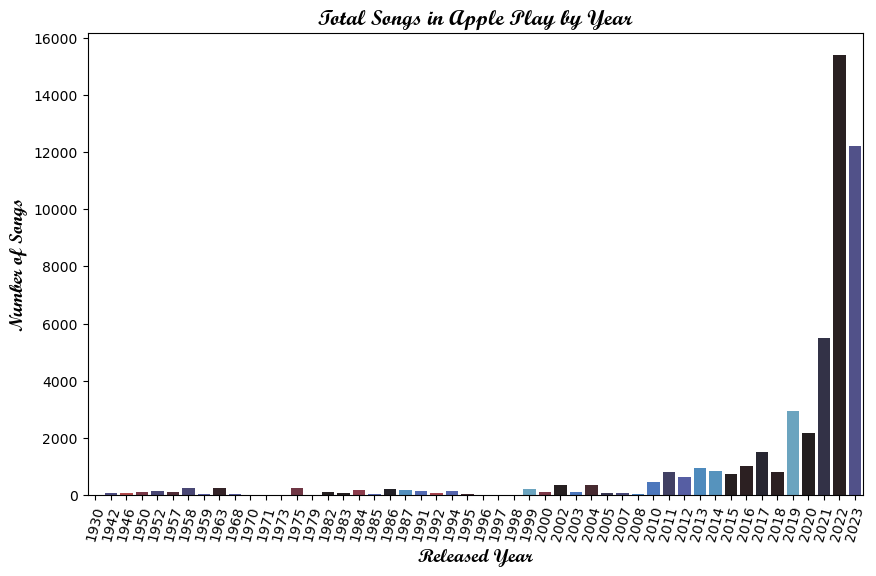

In [26]:
colors = colors_from_values(df['in_spotify_charts'], "icefire")[:len(unique_years)]
df_year = df.groupby('released_year')['in_apple_charts'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='released_year', y='in_apple_charts', palette=colors)
plt.xlabel('Released Year', font = 'Script MT Bold', fontsize='14')
plt.ylabel('Number of Songs', font = 'Script MT Bold', fontsize='14')
plt.title('Total Songs in Apple Play by Year',font = 'Script MT Bold',  fontsize='16')
plt.xticks(rotation=75)
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_33012\1227524269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='released_year', palette='YlOrBr')


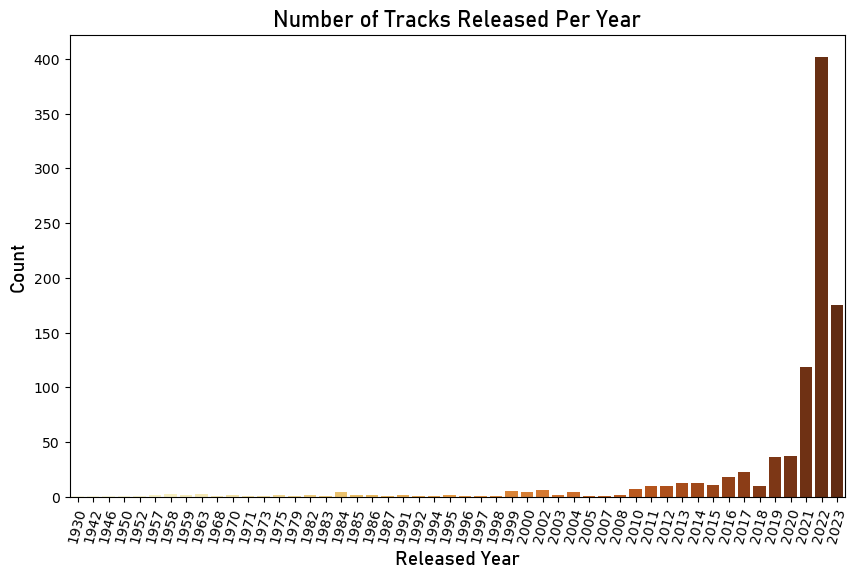

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='released_year', palette='YlOrBr')
plt.xlabel('Released Year', font = 'Bahnschrift', fontsize='14')
plt.ylabel('Count', font = 'Bahnschrift', fontsize='14')
plt.title('Number of Tracks Released Per Year',font = 'Bahnschrift',  fontsize='16')
plt.xticks(rotation=75)
plt.show()

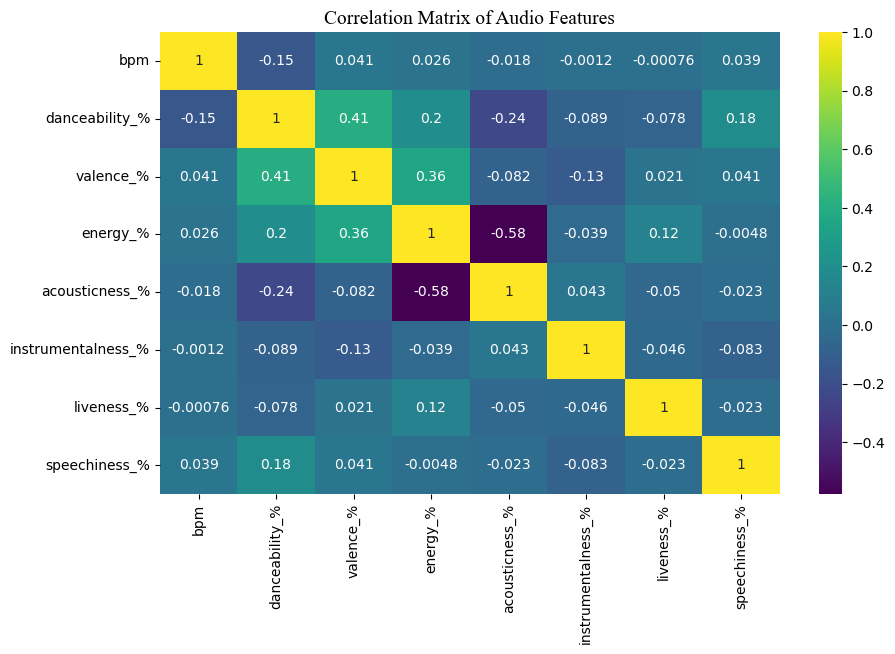

In [28]:
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
plt.figure(figsize=(10, 6))
corr_matrix = df[features].corr()
sns.heatmap(df[features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Audio Features',font='Times New Roman', fontsize='14')
plt.show()

<Figure size 1000x600 with 0 Axes>

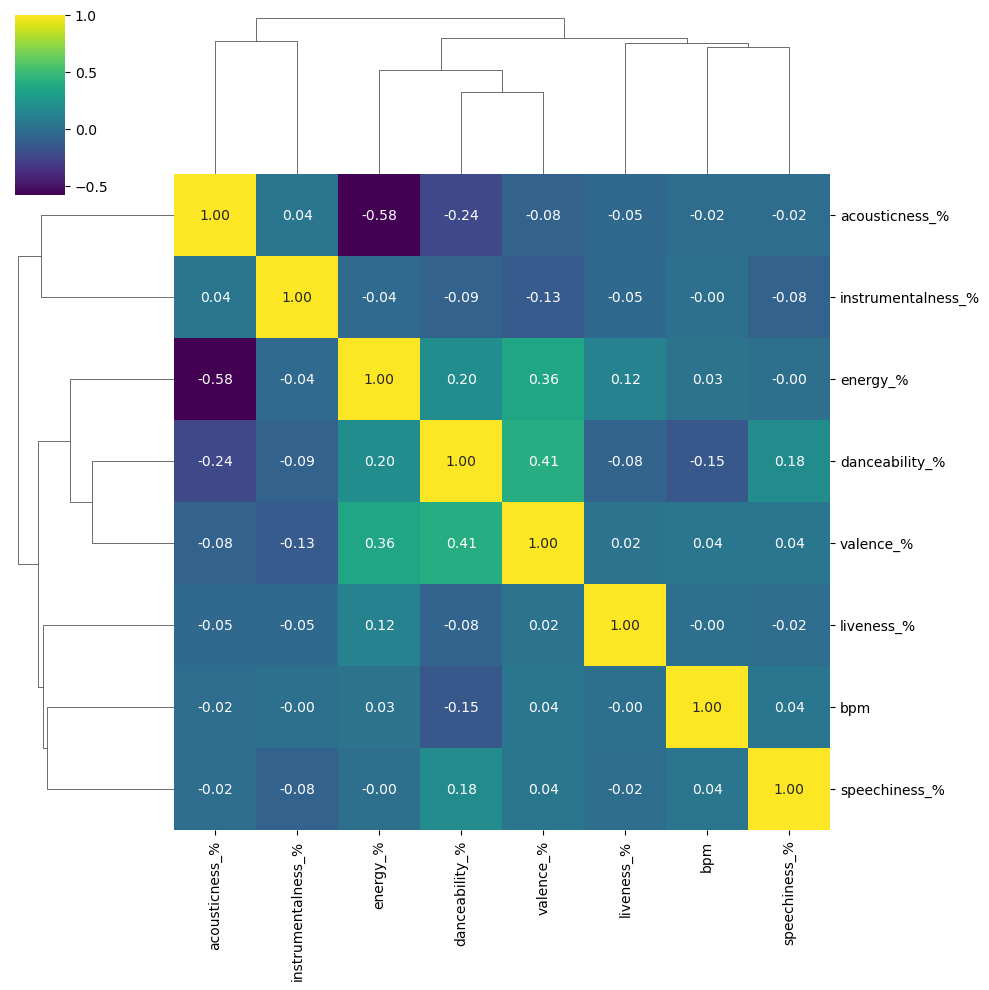

In [29]:
plt.figure(figsize=(10, 6))
sns.clustermap(corr_matrix, annot=True,cmap='viridis', fmt=".2f")
plt.show()

In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

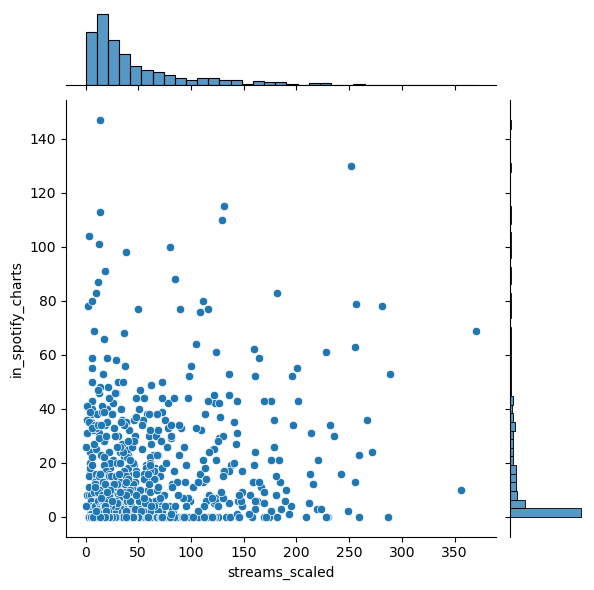

In [31]:
sns.jointplot(x='streams_scaled', y='in_spotify_charts', data=df, kind='scatter')

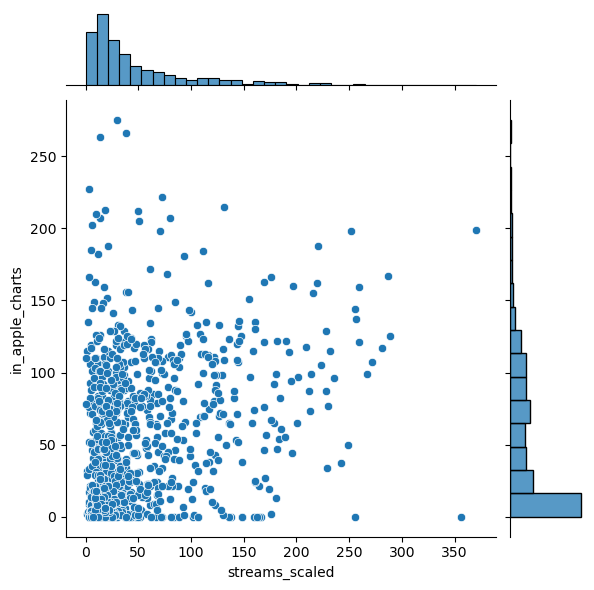

In [32]:
sns.jointplot(x='streams_scaled',y='in_apple_charts', data=df, kind='scatter')

C:\Users\chinm\AppData\Local\Temp\ipykernel_33012\1885763578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


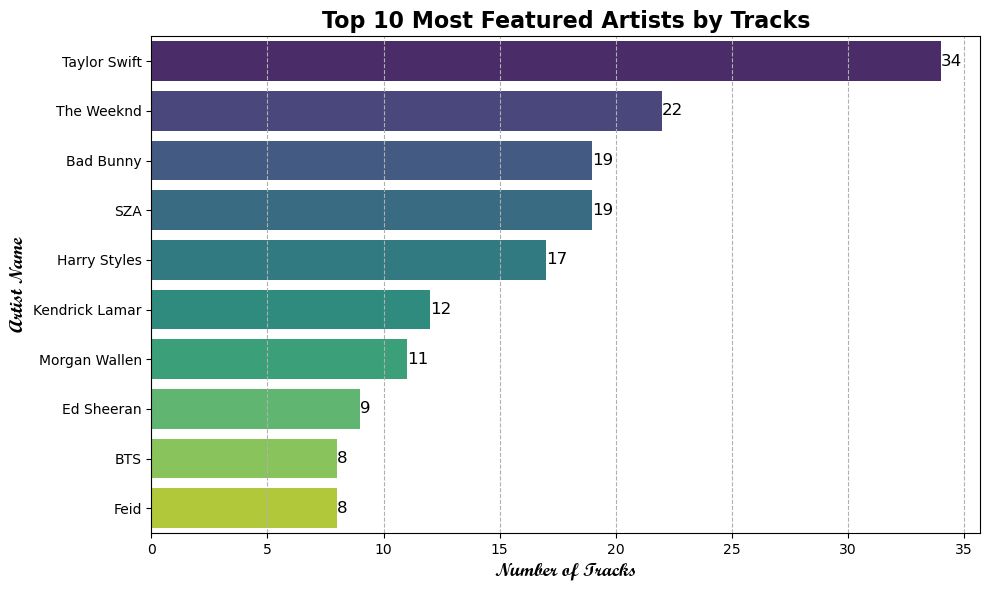

In [33]:
top_artists = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Most Featured Artists by Tracks', fontsize=16, fontweight='bold')
plt.xlabel('Number of Tracks', font='Script MT Bold', fontsize=14)
plt.ylabel('Artist Name',font='Script MT Bold', fontsize=14)
for index, value in enumerate(top_artists.values):
    plt.text(value, index, str(value), color='black', ha="left", va="center", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


In [34]:
df_streams = df.groupby('streams')['artist(s)_name'].sum().reset_index()

In [35]:
df_streams

,streams,artist(s)_name
0,2762,"Carin Leon, Grupo Frontera"
1,1365184,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V..."
2,11599388,"Sog, Ryan Castro, Peso Pluma"
3,11956641,"Mc Pedrinho, DJ 900"
4,14780425,Post Malone
...,...,...
944,2808096550,"Post Malone, Swae Lee"
945,2864791672,Tones and I
946,2887241814,Lewis Capaldi
947,3562543890,Ed Sheeran


C:\Users\chinm\AppData\Local\Temp\ipykernel_33012\1744839843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='artist(s)_name', data=df_streams, palette='viridis')


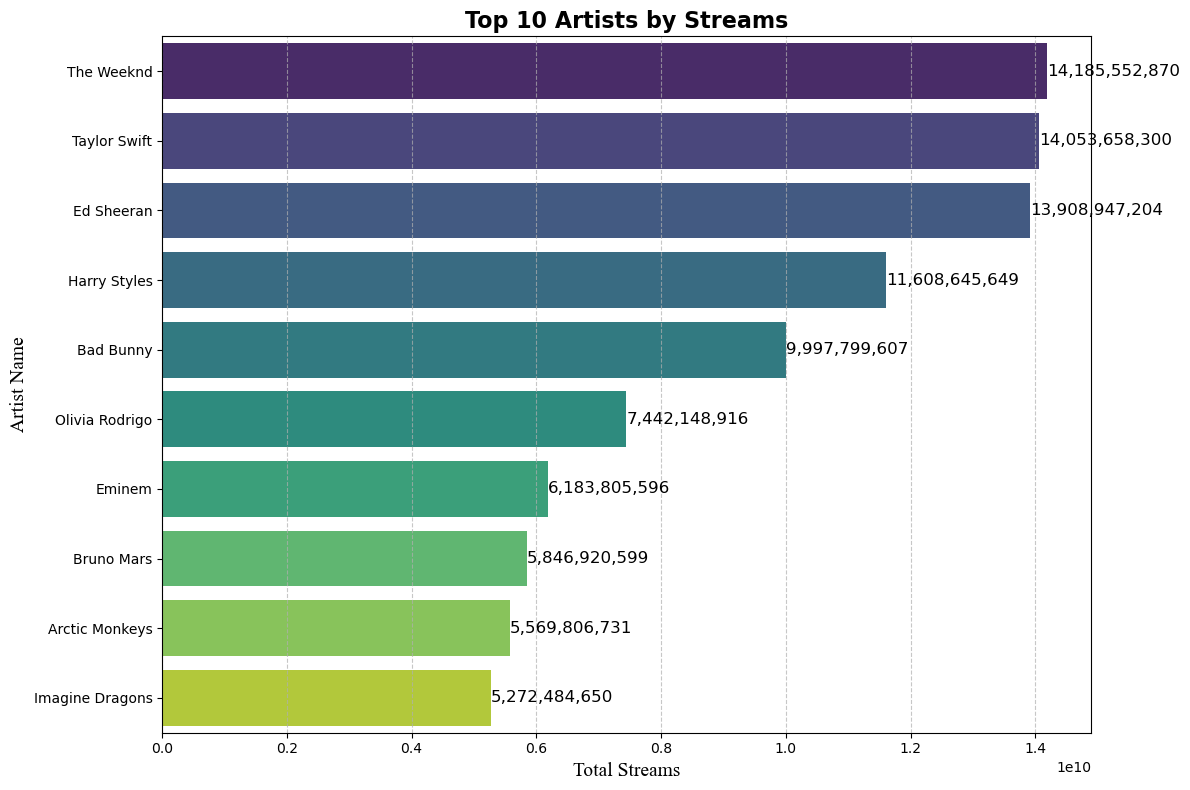

In [36]:
df_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='streams', y='artist(s)_name', data=df_streams, palette='viridis')
plt.title('Top 10 Artists by Streams', fontsize=16, fontweight='bold')
plt.xlabel('Total Streams', fontsize=14, font='Times New Roman')
plt.ylabel('Artist Name', fontsize=14, font='Times New Roman')
for index, value in enumerate(df_streams['streams']):
    plt.text(value, index, f'{value:,}', color='black', ha="left", va="center", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
df_year = df.groupby('released_year')['artist(s)_name'].sum().reset_index()

In [38]:
df_year

,released_year,artist(s)_name
0,1930,"Styrx, utku INC, Thezth"
1,1942,"Bing Crosby, John Scott Trotter & His Orchestr..."
2,1946,Nat King Cole
3,1950,"Frank Sinatra, B. Swanson Quartet"
4,1952,Burl Ives
5,1957,Bobby HelmsFrank Sinatra
6,1958,"Brenda LeePerry Como, The Fontane Sisters, Mit..."
7,1959,Dean MartinNat King Cole
8,1963,Andy WilliamsThe RonettesDarlene Love
9,1968,Creedence Clearwater Revival


<Figure size 1600x1600 with 0 Axes>

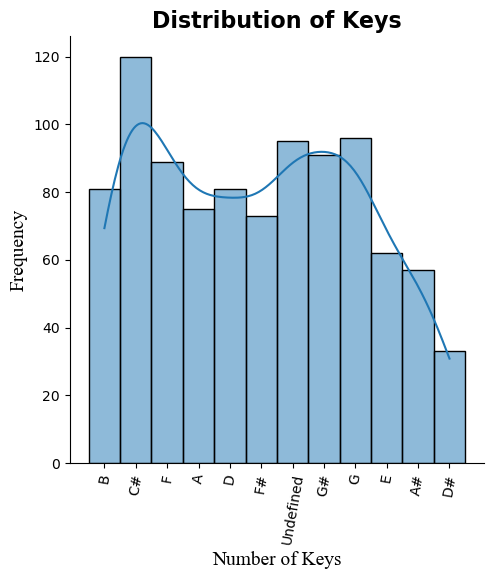

In [39]:
plt.figure(figsize=(16, 16))
sns.displot(data=df, x=df['key'], kde=True)
plt.title('Distribution of Keys',fontweight='bold', fontsize=16)
plt.xlabel('Number of Keys',font='Times New Roman', fontsize=14)
plt.ylabel('Frequency',font='Times New Roman', fontsize=14)
plt.xticks(rotation=80)
plt.show()

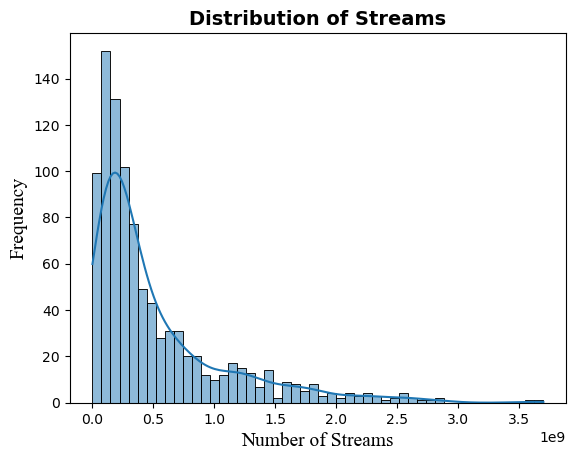

In [40]:
sns.histplot(df['streams'], bins=50, kde=True)
plt.title('Distribution of Streams', fontweight='bold', fontsize=14)
plt.xlabel('Number of Streams', font='Times New Roman', fontsize=14)
plt.ylabel('Frequency', font='Times New Roman',fontsize=14)
plt.show()

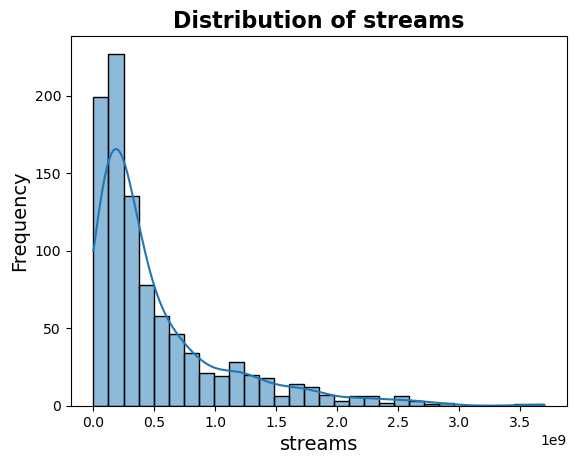

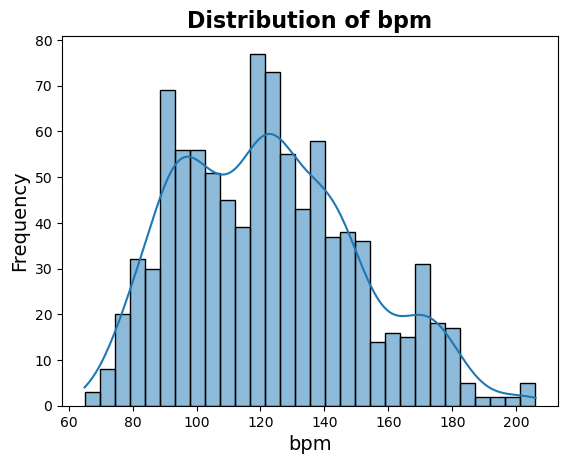

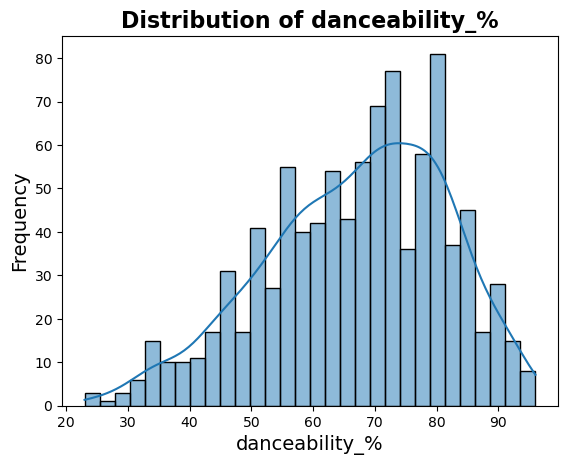

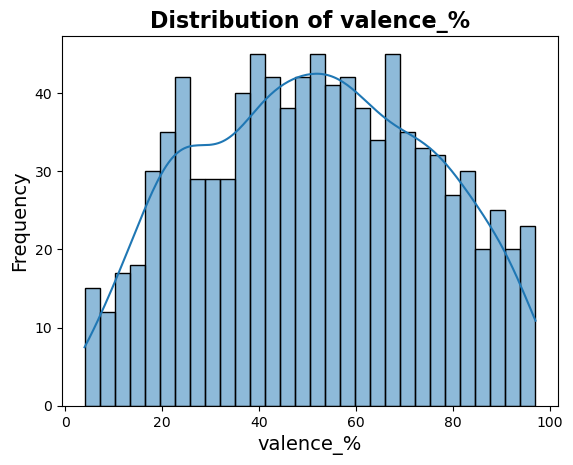

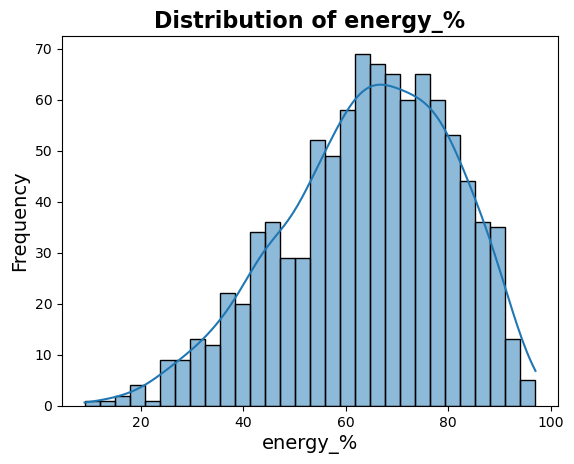

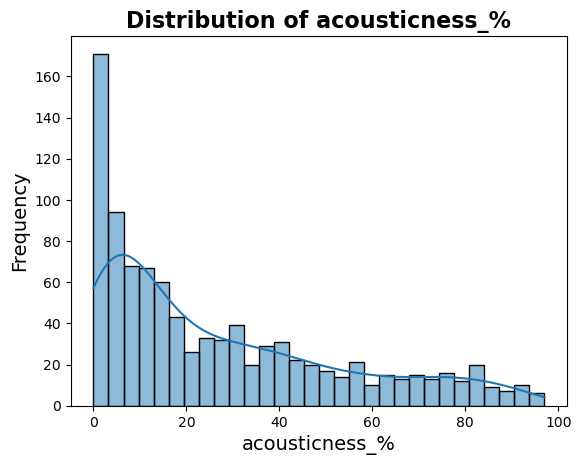

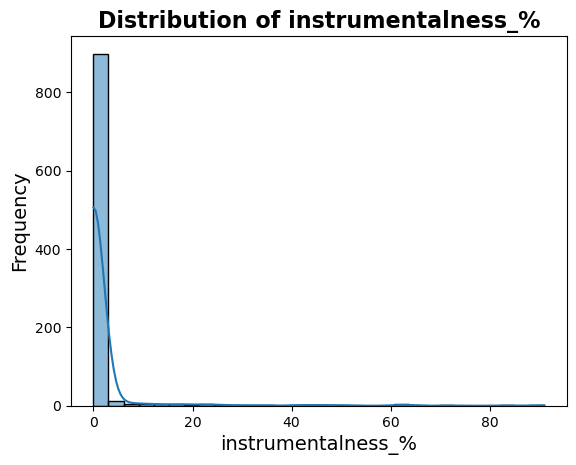

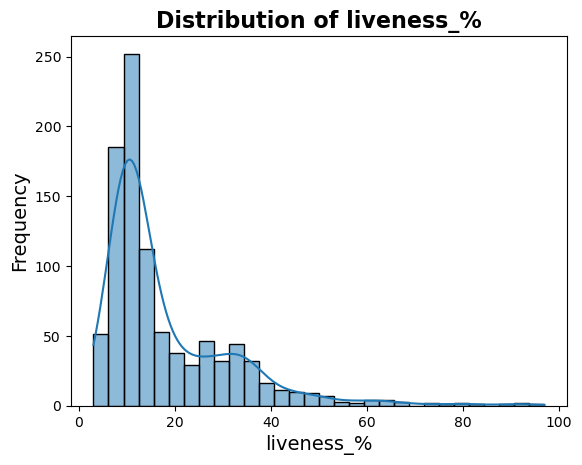

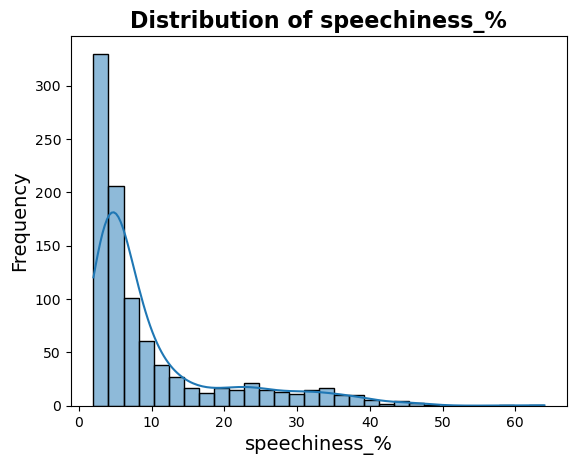

In [41]:
features = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for feature in features:
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}', fontweight='bold', fontsize=16)
    plt.xlabel(feature, fontsize=14, )
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

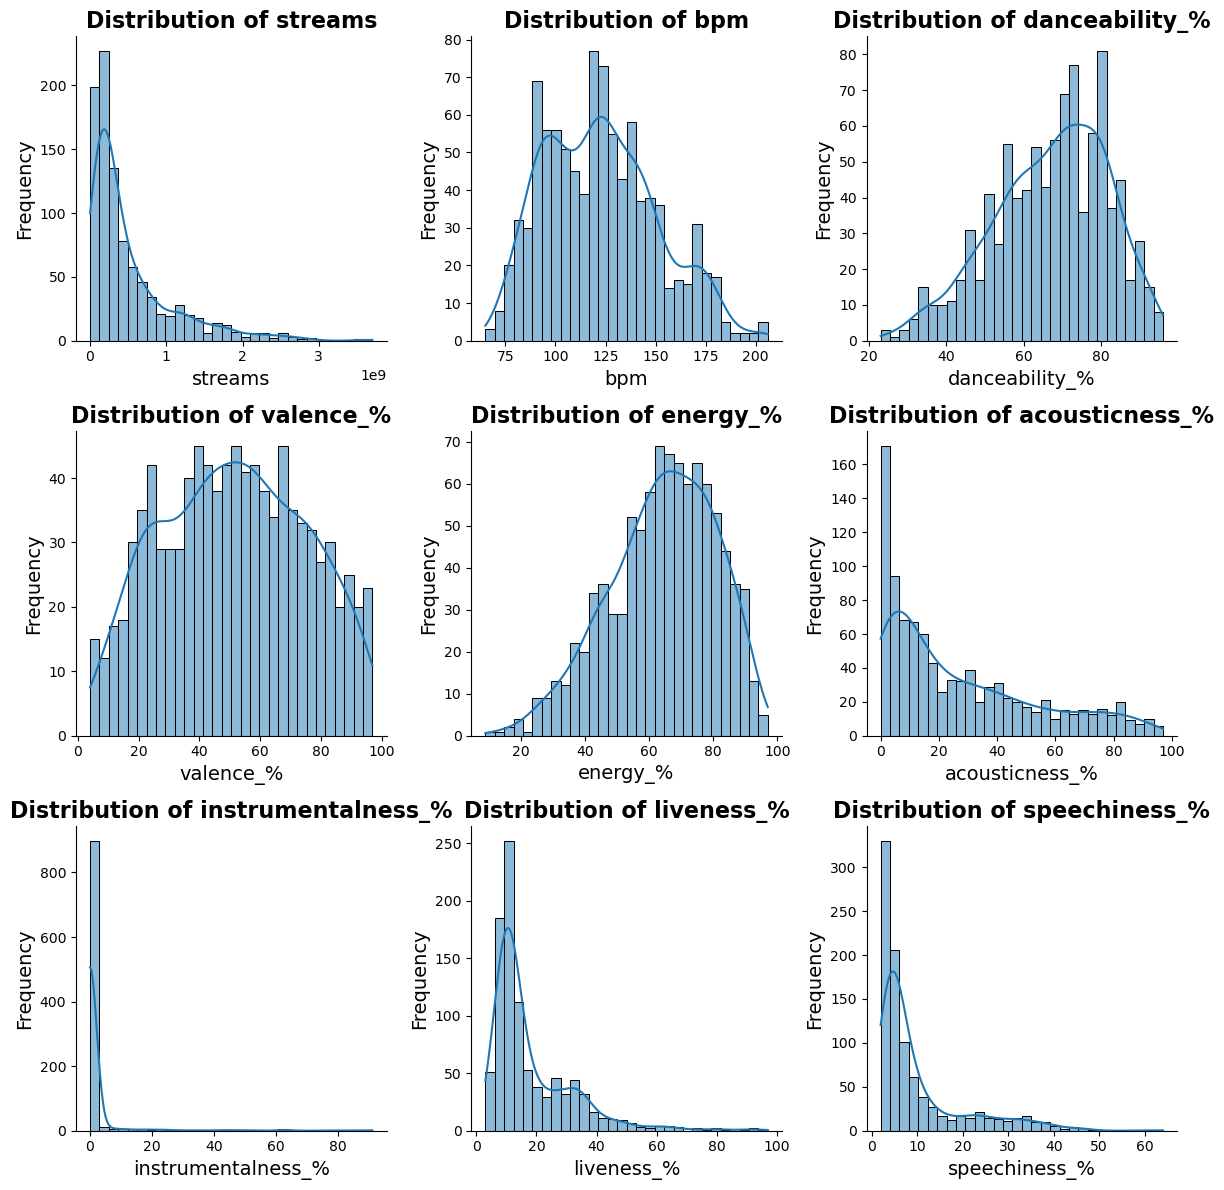

In [42]:
features = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
g = sns.FacetGrid(pd.melt(df, value_vars=features), col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', kde=True, bins=30)
for ax, feature in zip(g.axes.flat, features):
    ax.set_title(f'Distribution of {feature}', fontweight='bold', fontsize=16)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()